# AIA Malaysia Funds Analysis

@author : 钟智强

> This application is designed to retrieve and analyze the most up-to-date fund details, enabling comprehensive comparisons for informed decision-making.

1. Download The Dataset from AIA Website

In [273]:
# Import Necessary Packages
try:
    import os
    import time
    import platform
    import pandas as pd
    import seaborn as sns
    import mplfinance as mpf
    import numpy as np
    import matplotlib.pyplot as plt
    from IPython.display import display
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.common.keys import Keys
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.common.action_chains import ActionChains
    from selenium.webdriver.chrome.options import Options
    from webdriver_manager.chrome import ChromeDriverManager
except ImportError as e:
    display(f"Failed to import necessary packages: {e}")
else:
    display("All packages imported successfully")

'All packages imported successfully'

(Optional) Save all the generated graphs to files

In [274]:
_OUTPUT_DIR_ = "../output/graphs"
os.makedirs(_OUTPUT_DIR_, exist_ok=True)

_is_download_ = False # Set True if wanted to download the graph

In [275]:
# Base Url Declaration
_AIA_FUND_ = "https://www.aia.com.my/en/our-products/investment-linked-funds.html"

In [276]:
"""
Declare the 'driver' variable globally so it can be accessed throughout the script.
"""
global driver

"""
Check if the file "Funds_List.csv" exists in the "../data" directory.
If the file does not exist, the script will proceed to download it.
"""
if not os.path.isfile("../data/Funds_List.csv"):

    """
    Check the operating system. If it's not macOS ("Darwin"), we configure Chrome to run in headless mode.
    Headless mode allows Chrome to operate without a graphical user interface, which is useful for automated tasks.
    """
    if platform.system() != "Darwin":
        chrome_options = Options()

        # Run Chrome in headless mode, meaning it operates without a visible browser window.
        chrome_options.add_argument("--headless")

        """
        Initialize the WebDriver using ChromeDriverManager.
        The service points to the specific path of the ChromeDriver, which is needed to control the Chrome browser.
        The ChromeDriver can be downloaded from the provided links depending on your OS version.
        """
        service = Service("config/chromedriver")

        """
        Uncomment the following line to enable the Chrome WebDriver.
        This would allow the script to use Chrome to perform web scraping tasks.
        """
        # driver = webdriver.Chrome(service=service, options=chrome_options)

        # Set the driver to None, effectively disabling it unless the Chrome WebDriver is uncommented.
        driver = None

    else:
        """
        If the operating system is macOS ("Darwin"), initialize the WebDriver using Safari.
        SafariDriver comes pre-installed with macOS and is a good alternative if Chrome is not used.
        """
        driver = webdriver.Safari()

    """
    Navigate to the URL defined by '_AIA_FUND_' using the WebDriver.
    This URL likely points to a webpage where the funds list can be downloaded.
    """
    driver.get(_AIA_FUND_)

    # Display the driver instance, useful for debugging or ensuring the WebDriver is properly initialized.
    display(driver)

    """
    Locate the download button on the webpage using XPath. 
    The button is identified by its type ("submit"), class (containing "cmp-x3__button"), 
    and the text "Export list to CSV file".
    """
    download_button = driver.find_element(
        "xpath",
        '//button[@type="submit" and contains(@class, "cmp-x3__button") and .//span[contains(text(), "Export list to CSV file")]]',
    )

    # Click the download button to trigger the download of the funds list as a CSV file.
    download_button.click()

    # Close the WebDriver to free up resources after the download is complete.
    driver.quit()

# If the "Funds_List.csv" file already exists, the script will skip the download process.
else:
    pass

2. Load and Explore the Data
> First, load the CSV file into a pandas DataFrame and explore the data. This allows us to get an overview and perform initial filtering.

In [277]:
_AIA_FUND_LIST_ = "../data/Funds_List.csv"

# Load the CSV file
df = pd.read_csv(_AIA_FUND_LIST_)

# Display the first few rows of the DataFrame
display(df.head())


,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
0,A-Dana Strategic Dynamic,APTB,Balanced,Local & Foreign,Shariah,Moderate,1.16069,-0.00901,04-Sep-2024
1,AIA Balanced Fund,AIA,Balanced,Local,Non-Shariah,Moderate,4.76559,-0.02300,04-Sep-2024
2,AIA Dana Progresif*,AIA,Balanced,Local,Shariah,Moderate,3.19374,-0.01854,04-Sep-2024
3,AIA Elite Conservative Fund,AIA,Balanced,Foreign,Non-Shariah,Moderate,1.05588,-0.00731,04-Sep-2024
4,AIA Global Balanced Fund,AIA,Balanced,Foreign,Non-Shariah,Moderate,1.05947,-0.01055,04-Sep-2024


3. Filter and Identify the Best Funds
> We can filter the data based on various criteria, such as the risk level, asset allocation, or performance (e.g., NAV price, movement). For illustration, let's assume we want to find the top 5 funds based on the NAV Price or Movement.

In [278]:
"""
# Convert 'Nav Price' and 'Movement' columns to numeric data types, if they aren't already
# This is important because these columns may contain non-numeric values,
# such as strings or missing values, which could interfere with analysis.
# The 'errors="coerce"' parameter ensures that any non-numeric values are converted to NaN (Not a Number),
# which makes it easier to handle and filter out invalid data later on.
"""
df["Nav Price"] = pd.to_numeric(df["Nav Price"], errors="coerce")
df["Movement"] = pd.to_numeric(df["Movement"], errors="coerce")

"""
# Sort the DataFrame by 'Nav Price' in descending order to find the top 5 funds with the highest NAV Price.
# The 'ascending=False' parameter ensures that the highest values appear at the top.
# This allows us to quickly identify the funds that have the highest NAV (Net Asset Value),
# which could indicate better performance or higher returns.
"""
top_funds_by_nav = df.sort_values(by="Nav Price", ascending=False).head(5)

"""
# Similarly, sort the DataFrame by 'Movement' in descending order to find the top 5 funds with the highest Movement.
# 'Movement' typically represents the change in the NAV Price over a period of time,
# so this helps in identifying the most volatile or dynamically performing funds.
"""
top_funds_by_movement = df.sort_values(by="Movement", ascending=False).head(5)

"""
# Display the top 5 funds based on NAV Price.
# This output will help users see which funds are currently leading in terms of their asset value.
"""
display("Top Funds by NAV Price:")
display(top_funds_by_nav)

"""
# Display the top 5 funds based on Movement.
# This output will show which funds have experienced the most significant changes,
# providing insight into potentially high-growth opportunities or risks.
"""
display("Top Funds by Movement:")
display(top_funds_by_movement)

'Top Funds by NAV Price:'

,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
19,AIA Medium Cap Fund,AIA,Equity,Local,Non-Shariah,High,7.67636,-0.07367,04-Sep-2024
9,AIA Aggressive Fund,AIA,Equity,Local,Non-Shariah,High,7.20588,-0.04717,04-Sep-2024
16,AIA Equity Plus Fund,AIA,Equity,Local,Non-Shariah,High,5.19382,-0.03078,04-Sep-2024
1,AIA Balanced Fund,AIA,Balanced,Local,Non-Shariah,Moderate,4.76559,-0.02300,04-Sep-2024
13,AIA Dana Dinamik*,AIA,Equity,Local,Shariah,High,4.53247,-0.03444,04-Sep-2024


'Top Funds by Movement:'

,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
30,AIA Global Bond Fund 4,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.82695,0.01428,19-Oct-2022
28,AIA Global Bond Fund 2,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.88540,0.00533,21-Jul-2022
29,AIA Global Bond Fund 3,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.84943,0.00210,30-Aug-2022
26,AIA Global Bond Fund,AIA,Fixed Income,Foreign,Non-Shariah,Low,0.91828,0.00012,17-May-2022
37,A-Dana Income,AIA PUBLIC,Fixed Income,Local,Shariah,Low,0.93573,0.00011,04-Sep-2024


4. Visualize the Data

-  4a. Bar Chart for NAV Price and Movement

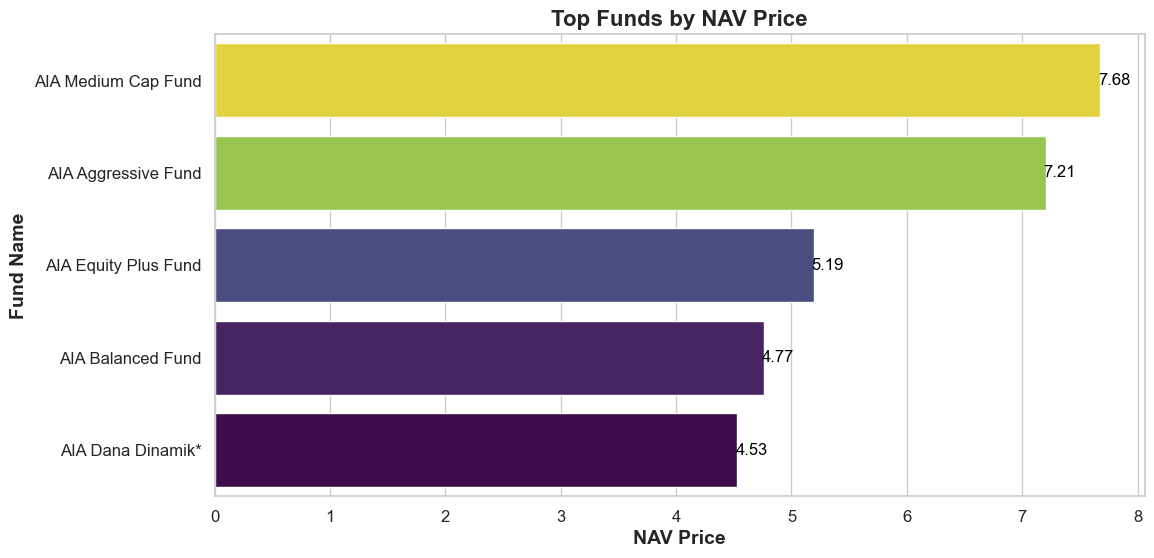

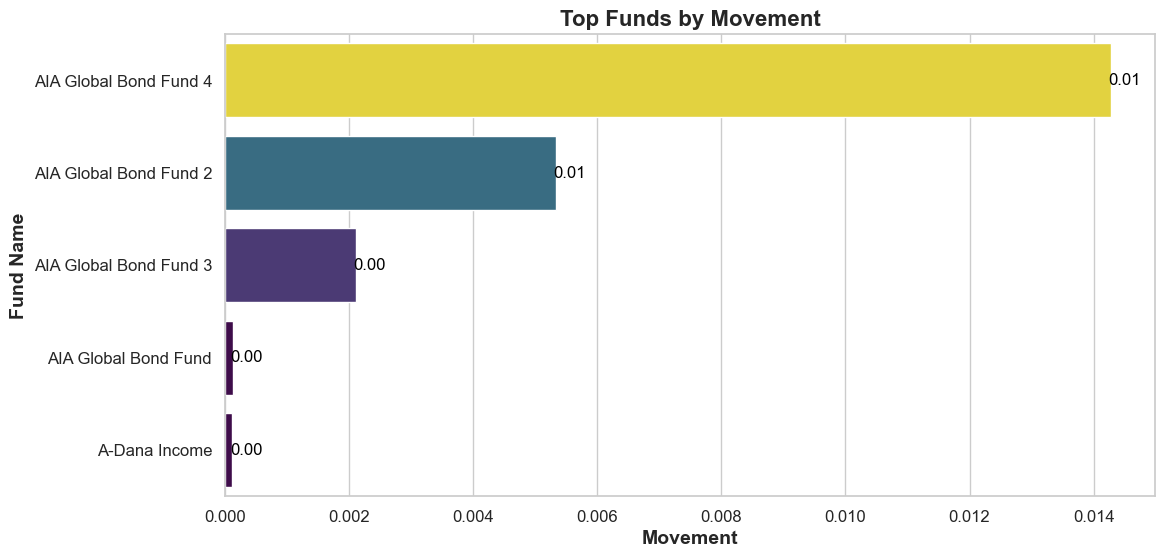

In [279]:
"""
Set up the plotting style using seaborn's "whitegrid" theme.
This provides a clean background with grid lines for easier data interpretation.
"""

sns.set(style="whitegrid")

"""
Create a bar plot to visualize the top funds based on NAV Price.

1. The figure size is set to 12x6 inches, providing a good balance between readability and space utilization.
2. 'sns.barplot' is used to create the bar plot:
   - 'x' and 'y' specify the data columns for the X and Y axes, respectively.
   - 'data' is the DataFrame containing the fund data.
   - 'palette' is set to 'viridis', which is a visually appealing color map.
   - 'legend=False' disables the automatic legend generation, as it's not needed in this context.
   - 'hue' is set to "Nav Price" to create a gradient effect based on the NAV Price values.
3. The plot is titled "Top Funds by NAV Price", with a bold font for emphasis.
4. Axis labels and tick sizes are customized for better readability.
"""
plt.figure(figsize=(12, 6))
nav_plot = sns.barplot(
    x="Nav Price",
    y="Fund Name",
    data=top_funds_by_nav,
    palette="viridis",
    legend=False,
    hue="Nav Price",
)
plt.title("Top Funds by NAV Price", fontsize=16, fontweight="bold")
plt.xlabel("NAV Price", fontsize=14)
plt.ylabel("Fund Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

"""
Add data labels to each bar in the bar plot.
This loop iterates over each bar ('patch') in the plot:
- The label is formatted to two decimal places.
- The label is positioned in the center of each bar, slightly offset to the right.
- The text is colored black and sized appropriately for clarity.
"""
for p in nav_plot.patches:
    nav_plot.annotate(
        format(p.get_width(), ".2f"),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        xytext=(10, 0),
        textcoords="offset points",
        fontsize=12,
        color="black",
    )

plt.show()

"""
If the _is_download_ flag is set to True, save the figure to the specified output directory.
The file is saved as "Top Funds by NAV Price.png". After saving, the plot is closed to free up memory.
"""
if _is_download_:
    plt.savefig(os.path.join(_OUTPUT_DIR_, "Top Funds by NAV Price.png"))
    plt.close()

"""
Create a bar plot to visualize the top funds based on Movement.

1. Similar setup to the previous plot, but this time focusing on the 'Movement' data.
2. The 'palette' is kept consistent with 'viridis' for visual coherence.
3. Axis labels, title, and tick sizes are customized for readability.
"""
plt.figure(figsize=(12, 6))
movement_plot = sns.barplot(
    x="Movement",
    y="Fund Name",
    data=top_funds_by_movement,
    palette="viridis",
    legend=False,
    hue="Movement",
)
plt.title("Top Funds by Movement", fontsize=16, fontweight="bold")
plt.xlabel("Movement", fontsize=14)
plt.ylabel("Fund Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

"""
Add data labels to each bar in the Movement bar plot.
This loop functions similarly to the one above, ensuring each bar is labeled with its corresponding value.
"""
for p in movement_plot.patches:
    movement_plot.annotate(
        format(p.get_width(), ".2f"),
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center",
        va="center",
        xytext=(10, 0),
        textcoords="offset points",
        fontsize=12,
        color="black",
    )

"""
Display the Movement plot.
"""
plt.show()

"""
If the _is_download_ flag is set to True, save the Movement plot to the specified output directory.
The file is saved as "Top Funds by Movement.png". After saving, the plot is closed to free up memory.
"""
if _is_download_:
    plt.savefig(os.path.join(_OUTPUT_DIR_, "Top Funds by Movement.png"))
    plt.close()

- 4b. Scatter Plot to Compare NAV Price and Movement

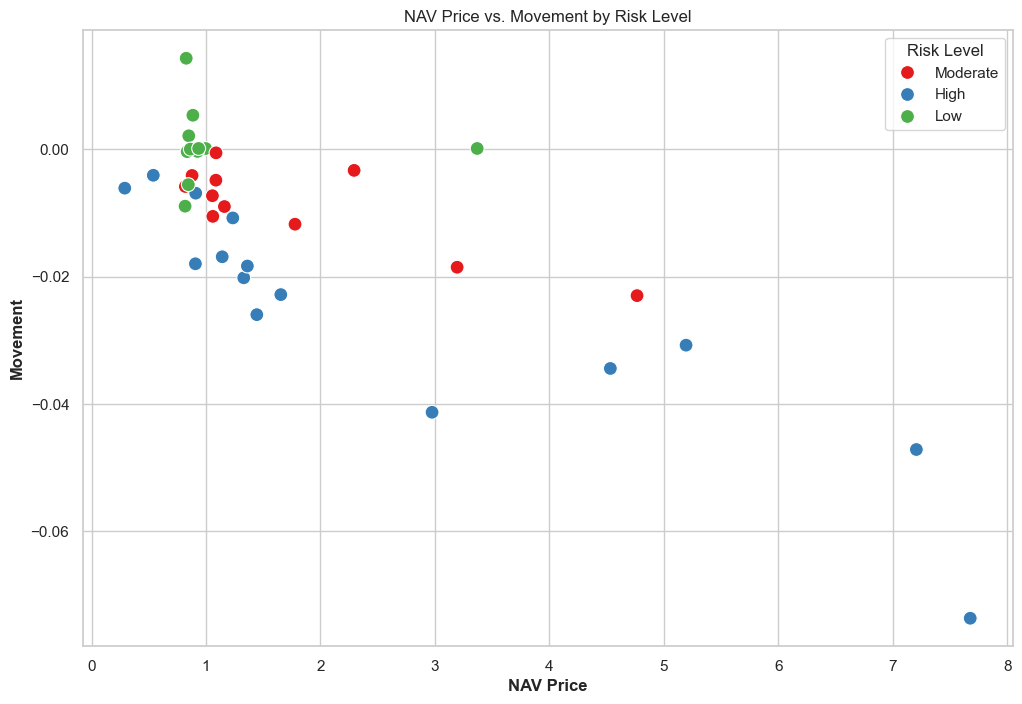

In [280]:
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=df, x="Nav Price", y="Movement", hue="Risk Level", palette="Set1", s=100
)

plt.title("NAV Price vs. Movement by Risk Level")
plt.xlabel("NAV Price")
plt.ylabel("Movement")
plt.legend(title="Risk Level")
plt.show()

5. Additional Filtering and Comparison
> We might want to filter funds based on asset allocation, market, or Shariah compliance. 

In [281]:
# Filter funds that are Shariah compliant
shariah_funds = df[df["Shariah/Non-Sariah"] == "Shariah"]

# Filter by Asset Allocation (e.g., 'Local')
local_funds = df[df["Asset Allocation"] == "Local"]

# Display the filtered DataFrames
display("Shariah Compliant Funds:")
display(shariah_funds)

'Shariah Compliant Funds:'

,Fund Name,Entity,Asset Allocation,Market,Shariah/Non-Sariah,Risk Level,Nav Price,Movement,Valuation Date
0,A-Dana Strategic Dynamic,APTB,Balanced,Local & Foreign,Shariah,Moderate,1.16069,-0.00901,04-Sep-2024
2,AIA Dana Progresif*,AIA,Balanced,Local,Shariah,Moderate,3.19374,-0.01854,04-Sep-2024
7,A-Dana Balanced,AIA PUBLIC,Balanced,Local,Shariah,Moderate,1.77759,-0.01178,04-Sep-2024
8,A-Dali Equity,APTB,Equity,Local,Shariah,High,0.53947,-0.00410,04-Sep-2024
13,AIA Dana Dinamik*,AIA,Equity,Local,Shariah,High,4.53247,-0.03444,04-Sep-2024
22,A-Dana Equity,APTB,Equity,Local,Shariah,High,0.91012,-0.00691,04-Sep-2024
23,A-Dana Strategic Equity,APTB,Equity,Local & Foreign,Shariah,High,1.23428,-0.01080,04-Sep-2024
24,AIA Dana Bon*,AIA,Fixed Income,Local,Shariah,Low,0.99707,0.00010,04-Sep-2024
37,A-Dana Income,AIA PUBLIC,Fixed Income,Local,Shariah,Low,0.93573,0.00011,04-Sep-2024


6. Get the Fund with the Highest Return
We can interpret "highest return" as the highest NAV Price or Movement.

In [282]:
# Get the fund with the highest NAV Price
highest_nav_fund = df.loc[df["Nav Price"].idxmax()]

# Display the fund with the highest NAV Price
display("Fund with the Highest NAV Price:")
display(highest_nav_fund)

'Fund with the Highest NAV Price:'

Fund Name             AIA Medium Cap Fund
Entity                                AIA
Asset Allocation                   Equity
Market                              Local
Shariah/Non-Sariah            Non-Shariah
Risk Level                           High
Nav Price                         7.67636
Movement                         -0.07367
Valuation Date                04-Sep-2024
Name: 19, dtype: object

7. Visualize the Fund with the Highest Return

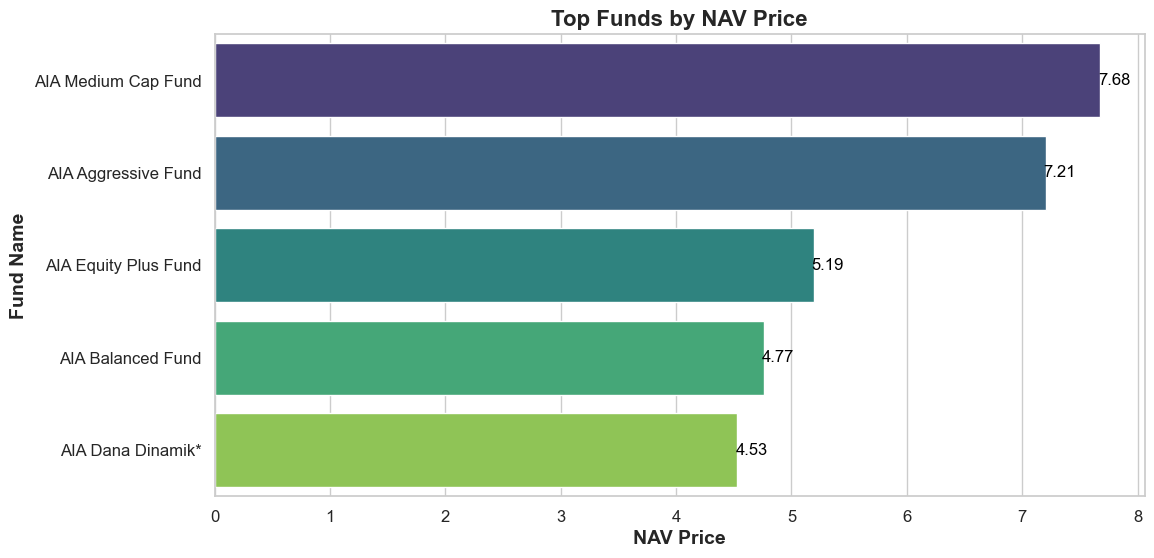

In [283]:
# Set up the plotting style
sns.set(style="whitegrid")

# Highlight the highest NAV fund in the bar chart
plt.figure(figsize=(12, 6))
nav_plot = sns.barplot(
    x="Nav Price",
    y="Fund Name",
    data=top_funds_by_nav,
    palette="viridis",
    legend=False,
    hue="Fund Name",
)
plt.title("Top Funds by NAV Price", fontsize=16, fontweight="bold")
plt.xlabel("NAV Price", fontsize=14)
plt.ylabel("Fund Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highlight the highest NAV fund
highest_nav_name = highest_nav_fund["Fund Name"]
for p in nav_plot.patches:
    if (
        p.get_y()
        == top_funds_by_nav[top_funds_by_nav["Fund Name"] == highest_nav_name].index[0]
    ):
        nav_plot.annotate(
            format(p.get_width(), ".2f"),
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha="center",
            va="center",
            xytext=(10, 0),
            textcoords="offset points",
            fontsize=12,
            color="red",  # Highlight in red
            weight="bold",
        )
    else:
        nav_plot.annotate(
            format(p.get_width(), ".2f"),
            (p.get_width(), p.get_y() + p.get_height() / 2),
            ha="center",
            va="center",
            xytext=(10, 0),
            textcoords="offset points",
            fontsize=12,
            color="black",
        )

plt.show()

8. Visualize Risk Levels


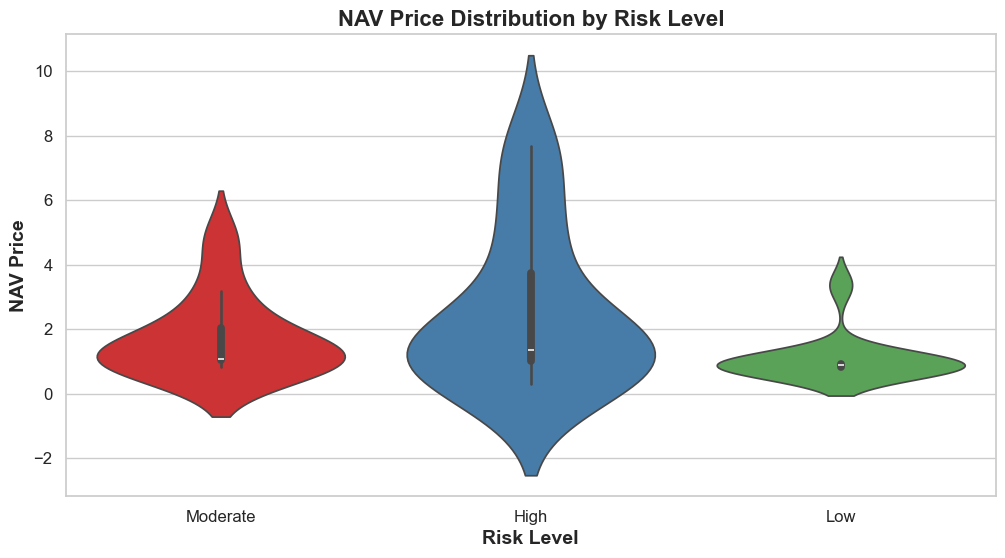

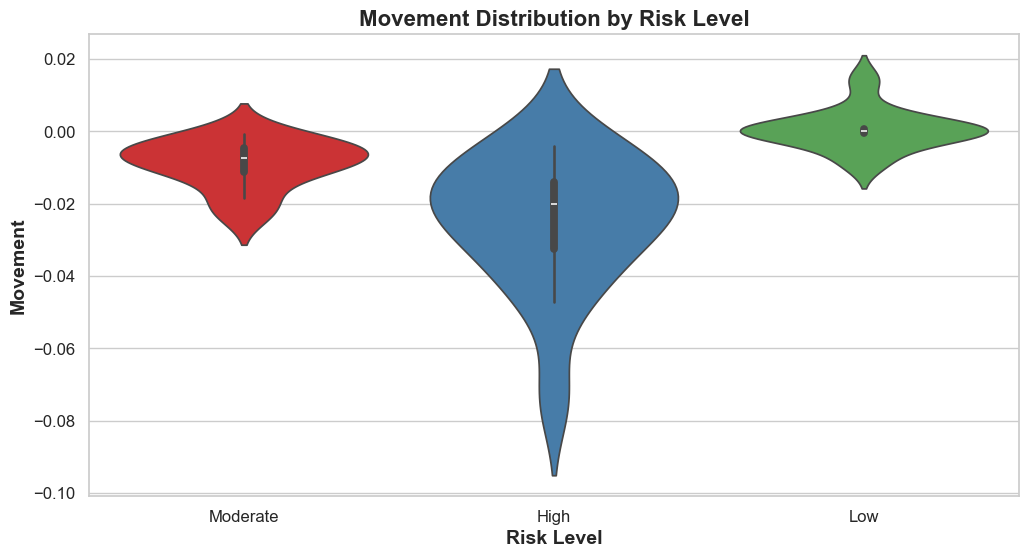

In [284]:
"""
Create a violin plot to visualize the distribution of NAV Price by Risk Level.
The violin plot combines aspects of a box plot and a density plot to show the spread 
and density of the data, allowing us to observe the distribution and identify any patterns 
or outliers in the NAV Price across different risk levels.
"""

plt.figure(figsize=(12, 6))  # Set the size of the figure
sns.violinplot(
    x="Risk Level",  # Set the x-axis to represent different risk levels
    y="Nav Price",  # Set the y-axis to represent NAV Prices
    data=df,  # Use the DataFrame `df` as the data source
    palette="Set1",  # Use the "Set1" color palette for the plot
    legend=False,  # Disable the legend as it's not needed for this plot
    hue="Risk Level",  # Use Risk Level to add a hue dimension, coloring by risk levels
)

plt.title(
    "NAV Price Distribution by Risk Level", fontsize=16, fontweight="bold"
)  # Set the plot title
plt.xlabel("Risk Level", fontsize=14)  # Label the x-axis
plt.ylabel("NAV Price", fontsize=14)  # Label the y-axis
plt.xticks(fontsize=12)  # Set the font size for the x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for the y-axis ticks
plt.show()  # Display the plot

"""
Create a violin plot to visualize the distribution of Movement by Risk Level.
Similar to the previous plot, this allows us to examine how the movement varies across 
different risk levels, giving insights into the volatility or performance of funds 
in relation to their associated risk.
"""
plt.figure(figsize=(12, 6))  # Set the size of the figure

sns.violinplot(
    x="Risk Level",  # Set the x-axis to represent different risk levels
    y="Movement",  # Set the y-axis to represent the Movement of funds
    data=df,  # Use the DataFrame `df` as the data source
    palette="Set1",  # Use the "Set1" color palette for the plot
    legend=False,  # Disable the legend as it's not needed for this plot
    hue="Risk Level",  # Use Risk Level to add a hue dimension, coloring by risk levels
)


plt.title(
    "Movement Distribution by Risk Level", fontsize=16, fontweight="bold"
)  # Set the plot title
plt.xlabel("Risk Level", fontsize=14)  # Label the x-axis
plt.ylabel("Movement", fontsize=14)  # Label the y-axis
plt.xticks(fontsize=12)  # Set the font size for the x-axis ticks
plt.yticks(fontsize=12)  # Set the font size for the y-axis ticks
plt.show()  # Display the plot

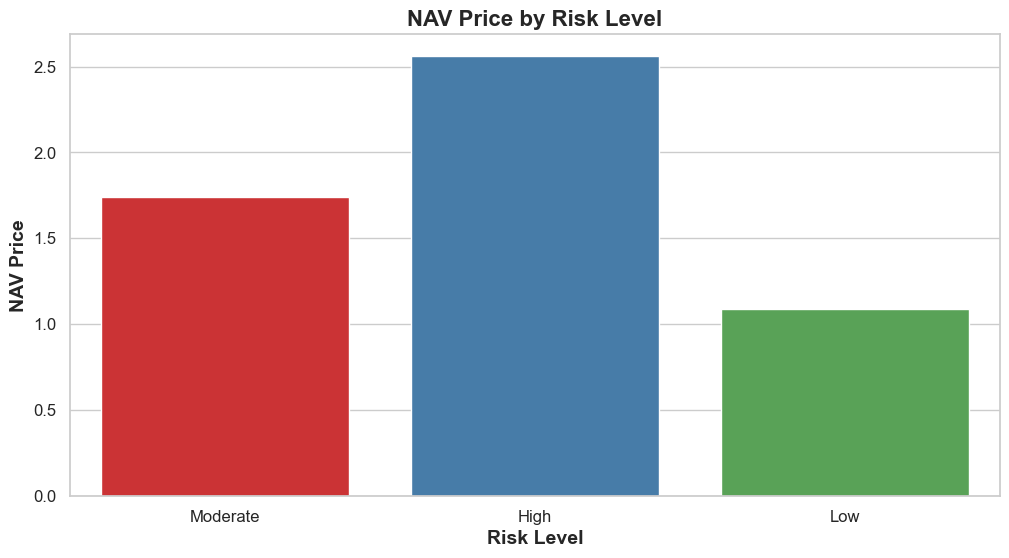

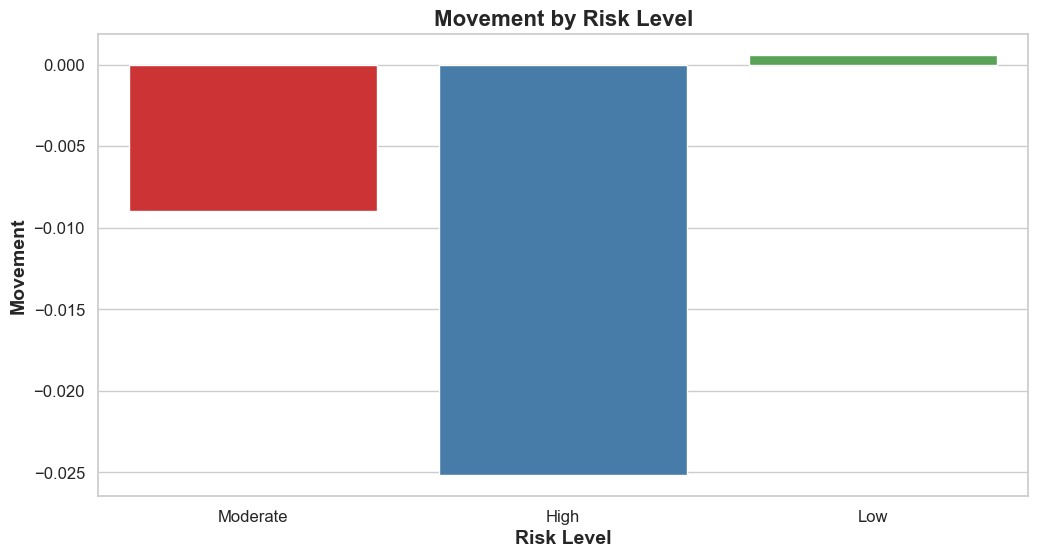

In [285]:
# Bar plot of NAV Price by Risk Level
plt.figure(figsize=(12, 6))
sns.barplot(x="Risk Level", y="Nav Price", data=df, palette="Set1", errorbar=None, hue="Risk Level")
plt.title("NAV Price by Risk Level", fontsize=16, fontweight="bold")
plt.xlabel("Risk Level", fontsize=14)
plt.ylabel("NAV Price", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Bar plot of Movement by Risk Level
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Risk Level",
    y="Movement",
    data=df,
    palette="Set1",
    errorbar=None,
    hue="Risk Level",
)
plt.title("Movement by Risk Level", fontsize=16, fontweight="bold")
plt.xlabel("Risk Level", fontsize=14)
plt.ylabel("Movement", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

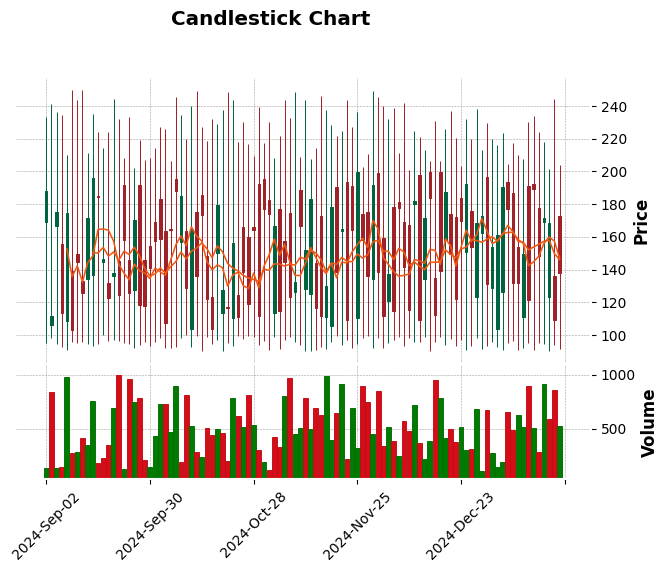

In [288]:
"""
# Check if essential columns exist in the DataFrame
# Generate example data if the columns 'Date', 'Open', 'High', 'Low', 'Close' are not present
"""
if not set(["Date", "Open", "High", "Low", "Close"]).issubset(df.columns):
    np.random.seed(50)  # Set a seed for reproducibility of random numbers

    # Generate a range of business days starting from '2024-09-01'
    date_range = pd.date_range(
        start="2024-09-01", periods=100, freq="B"  # 'B' stands for business days
    )

    # Create a DataFrame with random data for financial columns
    df = pd.DataFrame(
        {
            "Date": date_range,
            "Open": np.random.uniform(
                100, 200, len(date_range)
            ),  # Random open prices between 100 and 200
            "High": np.random.uniform(
                200, 250, len(date_range)
            ),  # Random high prices between 200 and 250
            "Low": np.random.uniform(
                90, 100, len(date_range)
            ),  # Random low prices between 90 and 100
            "Close": np.random.uniform(
                100, 200, len(date_range)
            ),  # Random close prices between 100 and 200
            "Volume": np.random.randint(
                100, 1000, len(date_range)
            ),  # Random volume between 100 and 1000
        }
    )

# Convert the 'Date' column to datetime format if it is not already
df["Date"] = pd.to_datetime(df["Date"])

# Set the 'Date' column as the index of the DataFrame
# This is required for mplfinance to properly plot the time series data
df.set_index("Date", inplace=True)

# Plot the candlestick chart using mplfinance
mpf.plot(
    df,
    type="candle",  # Specify the chart type as 'candle' for candlestick chart
    style="charles",  # Use 'charles' style for the chart appearance
    title="Candlestick Chart",  # Title of the chart
    ylabel="Price",  # Label for the y-axis
    volume=True,  # Include volume in the plot
    mav=(5, 10),  # Add moving averages with 5-day and 10-day windows
    # Uncomment the following line to save the figure if _is_download_ is True
    # savefig=(
    #     os.path.join(_OUTPUT_DIR_, "candlestick_chart.png") if _is_download_ else None
    # ),
)

# Display the chart
plt.show()

# If the _is_download_ flag is set to True, save the figure to the specified output directory
if _is_download_:
    plt.savefig(
        os.path.join(_OUTPUT_DIR_, "candlestick_chart.png")
    )  # Save the chart as a PNG file
    plt.close()  # Close the plot to free up memory